# Librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos

In [2]:
archive="WorkSpace 1000_50_5"

# Leer archivo

In [3]:
carpeta_archivo = "./data/positions/"
ruta_archivo = carpeta_archivo + archive + ".txt"

with open(ruta_archivo, 'r') as archivo:
    primera_linea = archivo.readline().strip()
    n, m, k = map(int, primera_linea.split())

df_sitios_a_proveer = pd.read_csv(ruta_archivo, skiprows=1, nrows=n, header=None, sep=r'\s+')
df_sitios_a_proveer.columns = ['x', 'y']  

df_sitios_de_suministro = pd.read_csv(ruta_archivo, skiprows=1+n, nrows=m, header=None, sep=r'\s+')
df_sitios_de_suministro.columns = ['x', 'y']

# Mostrar datos

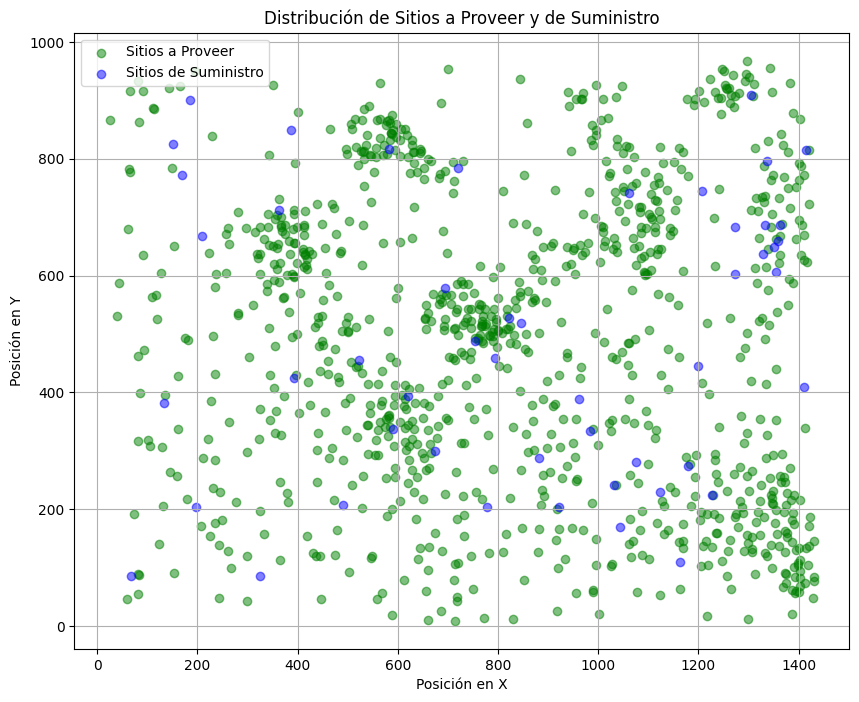

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(df_sitios_a_proveer['x'], df_sitios_a_proveer['y'], color='green', label='Sitios a Proveer', alpha=0.5)
plt.scatter(df_sitios_de_suministro['x'], df_sitios_de_suministro['y'], color='blue', label='Sitios de Suministro', alpha=0.5)

# Configurar etiquetas y leyenda
plt.xlabel('Posición en X')
plt.ylabel('Posición en Y')
plt.title('Distribución de Sitios a Proveer y de Suministro')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Elegir solución:

In [5]:
df_solutions=pd.read_csv("./Solutions/"+archive+".csv")
df_solutions

,solution,f1,f2,f3
0,"[1, 3, 8, 27, 30]",460.335747,248,85
1,"[1, 5, 7, 28, 30]",402.612717,295,218
2,"[3, 8, 9, 25, 30]",463.919174,211,22
3,"[0, 1, 3, 24, 31]",452.443367,257,99
4,"[1, 2, 4, 28, 30]",413.358198,265,173


In [6]:
solution=[1, 5, 7, 28, 30]

       x    y
1    779  204
5    393  424
7    961  389
28   720  785
30  1208  745


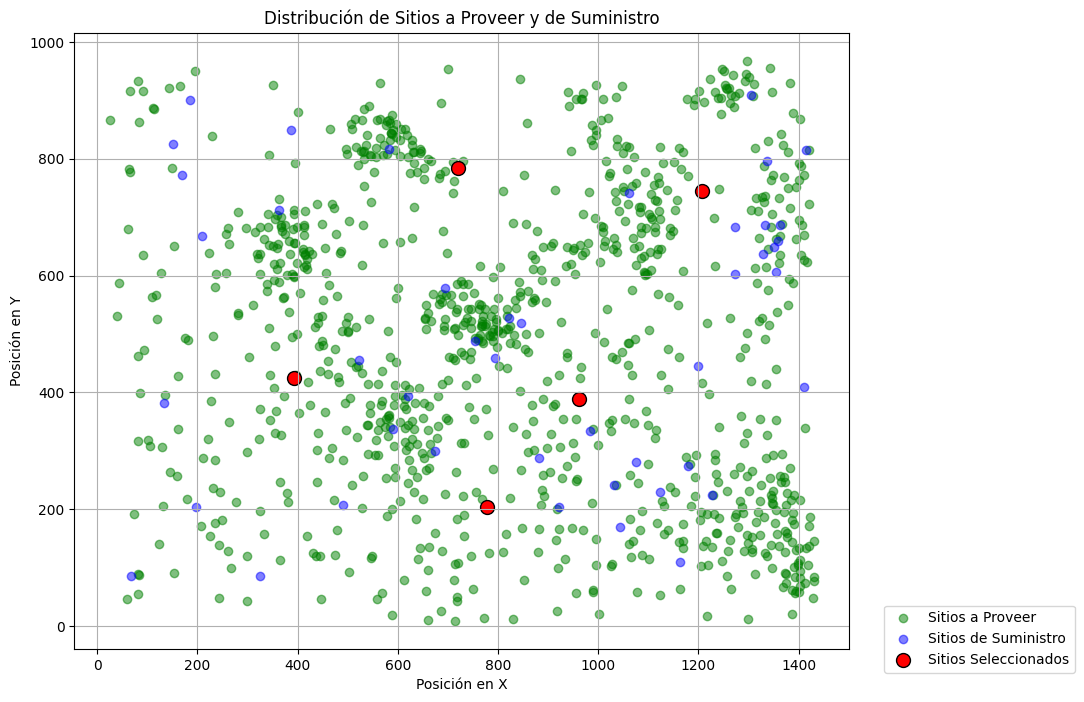

In [7]:
# Filtrar los puntos seleccionados
sitios_seleccionados = df_sitios_de_suministro.iloc[solution]

print(sitios_seleccionados)

plt.figure(figsize=(10, 8))

# Sitios a proveer
plt.scatter(df_sitios_a_proveer['x'], df_sitios_a_proveer['y'], color='green', label='Sitios a Proveer', alpha=0.5)

# Sitios de suministro
plt.scatter(df_sitios_de_suministro['x'], df_sitios_de_suministro['y'], color='blue', label='Sitios de Suministro', alpha=0.5)

# Sitios seleccionados en rojo
plt.scatter(sitios_seleccionados['x'], sitios_seleccionados['y'], color='red', label='Sitios Seleccionados', edgecolors='black', s=100)

# Configurar etiquetas y leyenda
plt.xlabel('Posición en X')
plt.ylabel('Posición en Y')
plt.title('Distribución de Sitios a Proveer y de Suministro')

# Leyenda fuera del gráfico, abajo a la derecha
plt.legend(loc='lower right', bbox_to_anchor=(1.3, -0.05))  # Ajusta el bbox_to_anchor si es necesario

plt.grid(True)

# Mostrar el gráfico
plt.show()


# Mostrar todas las soluciones en 3D

In [16]:
import plotly.express as px

# Crear figura interactiva 3D
fig = px.scatter_3d(
    df_solutions,
    x='f1',
    y='f2',
    z='f3',
    text='solution',  # Esto muestra la etiqueta en hover
    color='solution',  # Opcional: para dar colores distintos por solución
    title='Visualización 3D Interactiva de Soluciones',
)

# Mostrar etiquetas permanentemente
fig.update_traces(marker=dict(size=6), textposition='top center')

# Ajustar diseño
fig.update_layout(
    scene=dict(
        xaxis_title='f1',
        yaxis_title='f2',
        zaxis_title='f3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()
